# **Experiment Notebook**



In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<hr>

## A. Project


In [2]:
student_name = 'Max Chew '

In [3]:
student_id = '1355 2169'

In [4]:
experiment_id = '4'

<hr>

## B. Experiment Description


In [5]:
experiment_hypothesis = 'All features  from the dataset collectively contribute to predicting churn with some importance variation.'

In [6]:
experiment_expectations = 'The use of Random Forest to analyse features related to customers will result in being able to better predict customer churn behaviour.  '

<hr>

## C. Data Understanding


### C.0 Import Packages

In [7]:
# Pandas for data handling
import pandas as pd

# Scikit Learn for ML training
import sklearn

# Altair for plotting
import altair as alt

# numpy for math
import numpy as np

# scipystats for math
from scipy.stats import randint

# hypopt for hyperparameter tuning
from hypopt import GridSearch

<hr>

### C.1   Load Datasets

In [8]:
# Load training set
# Do not change this code

X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

In [9]:
# Load validation set
# Do not change this code

X_val = pd.read_csv('X_val.csv')
y_val = pd.read_csv('y_val.csv')

In [10]:
# Load testing set
# Do not change this code

X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

<hr>

<hr>

## D. Feature Selection


In [11]:
feature_selection_executive_summary = 'All features from the dataset are included in the model. '

> Rationale: The model can use all available features and assign feature  importance to those which provide the best predictive power.

In [12]:
# select all features
features_list = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'ContentType', 'DeviceRegistered',
       'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'SupportTicketsPerMonth',
       'Gender', 'CohortSimplifed']

X_train = X_train[features_list]
X_val = X_val[features_list]
X_test = X_test[features_list]

# get shape of datasets
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(18712, 14)
(6238, 14)
(6237, 14)


> Results: The training, validation and testing set each have 5 features and 18,712, 6,238 and 6,237 records respectively. 

<hr>

## E. Data Preparation

In [13]:
data_preparation_executive_summary = 'In order to prepare the data for quantitative analysis, one-hot encoding must be performed on categorical features. Unlike previous experiments best practice is to keep all options as multicollinearity is not a problem.'

> Rationale: Categorical data needs to be one-hot encoded in order to perform logistic regression.  

In [14]:
# Categorical features encoded using one-hot encoding

from sklearn.preprocessing import OneHotEncoder

# Create OneHotEncoder
RF_encoder = OneHotEncoder(drop=None, sparse_output=False)

# save unique values from variable for verification in val and test set 
subscription_values = list(X_train['SubscriptionType'].unique())

# save unique values from variable for verification in val and test set 
gender_values = list(X_train['Gender'].unique())

# save unique values from variable for verification in val and test set 
payment_values = list(X_train['PaymentMethod'].unique())

# save unique values from variable for verification in val and test set 
content_values = list(X_train['ContentType'].unique())

# save unique values from variable for verification in val and test set 
genre_values = list(X_train['GenrePreference'].unique())

# save unique values from variable for verification in val and test set 
cohort_values = list(X_train['CohortSimplifed'].unique())

# save unique values from variable for verification in val and test set 
devices_values = list(X_train['DeviceRegistered'].unique())

In [15]:
# Fit and transform the categorical column
encoded_cols = RF_encoder.fit_transform(X_train[['SubscriptionType', 'Gender', 'PaymentMethod', 'ContentType', 'GenrePreference', 'CohortSimplifed', 'DeviceRegistered']])

# Convert the result to a df and set names then rejoin
encoded_df = pd.DataFrame(encoded_cols, columns=RF_encoder.get_feature_names_out(['SubscriptionType', 'Gender', 'PaymentMethod', 'ContentType', 'GenrePreference', 'CohortSimplifed', 'DeviceRegistered']))
X_train = X_train.drop(columns=['SubscriptionType', 'Gender', 'PaymentMethod', 'ContentType', 'GenrePreference', 'CohortSimplifed', 'DeviceRegistered'])
X_train = pd.concat([X_train, encoded_df], axis=1)
X_train

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,SupportTicketsPerMonth,SubscriptionType_Basic,SubscriptionType_Premium,SubscriptionType_Standard,...,CohortSimplifed_0-4,CohortSimplifed_1-0,CohortSimplifed_1-1,CohortSimplifed_1-2,CohortSimplifed_1-3,CohortSimplifed_1-4,DeviceRegistered_Computer,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet
0,1.588845,0.016420,1.614839,-1.090333,0.445098,-0.535212,-0.869823,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.110144,1.500649,-0.711572,0.211828,-1.180326,0.779096,-0.171142,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.220801,-1.169333,0.097870,0.759197,-0.018520,0.571574,-0.520483,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.036779,0.843668,1.837829,-0.215220,0.389272,-1.641998,0.876880,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.619419,1.380670,-0.034457,0.848636,1.670202,1.055793,-1.219164,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18707,-0.312715,-0.078773,-0.272961,-1.652907,-1.441659,-0.120167,-0.171142,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
18708,-0.711430,0.963047,-0.303451,-1.728577,-0.821844,1.332489,0.527540,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18709,1.282142,-1.008796,0.293294,1.718039,0.387394,-0.258516,0.527540,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18710,-1.478188,1.440237,-1.256199,-0.872902,-0.256443,-0.327690,1.575562,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# remove rows from test and val sets which do not contain same values as test for categorical variable
X_val = X_val[X_val['SubscriptionType'].isin(subscription_values)]
X_test = X_test[X_test['SubscriptionType'].isin(subscription_values)]

X_val = X_val[X_val['GenrePreference'].isin(genre_values)]
X_test = X_test[X_test['GenrePreference'].isin(genre_values)]

X_val = X_val[X_val['CohortSimplifed'].isin(cohort_values)]
X_test = X_test[X_test['CohortSimplifed'].isin(cohort_values)]

X_val = X_val[X_val['Gender'].isin(gender_values)]
X_test = X_test[X_test['Gender'].isin(gender_values)]

X_val = X_val[X_val['PaymentMethod'].isin(payment_values)]
X_test = X_test[X_test['PaymentMethod'].isin(payment_values)]

X_val = X_val[X_val['ContentType'].isin(content_values)]
X_test = X_test[X_test['ContentType'].isin(content_values)]

X_val = X_val[X_val['DeviceRegistered'].isin(devices_values)]
X_test = X_test[X_test['DeviceRegistered'].isin(devices_values)]

In [17]:
# use one hot encoder to encode categorical variable for val 

encoded_cols = RF_encoder.transform(X_val[['SubscriptionType', 'Gender', 'PaymentMethod', 'ContentType', 'GenrePreference', 'CohortSimplifed', 'DeviceRegistered']])
encoded_df = pd.DataFrame(encoded_cols, columns=RF_encoder.get_feature_names_out(['SubscriptionType', 'Gender', 'PaymentMethod', 'ContentType', 'GenrePreference', 'CohortSimplifed', 'DeviceRegistered']))
X_val = X_val.drop(columns=['SubscriptionType', 'Gender', 'PaymentMethod', 'ContentType', 'GenrePreference', 'CohortSimplifed', 'DeviceRegistered'])
X_val = pd.concat([X_val, encoded_df], axis=1)
X_val

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,SupportTicketsPerMonth,SubscriptionType_Basic,SubscriptionType_Premium,SubscriptionType_Standard,...,CohortSimplifed_0-4,CohortSimplifed_1-0,CohortSimplifed_1-1,CohortSimplifed_1-2,CohortSimplifed_1-3,CohortSimplifed_1-4,DeviceRegistered_Computer,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet
0,-0.251375,1.625393,0.609444,-0.072945,1.644023,-0.466038,0.876880,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.147340,1.480921,1.122167,-1.280787,0.539795,-1.157779,0.876880,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.760746,0.679451,1.358220,1.474801,-1.118492,0.848270,1.575562,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.864781,0.383981,-0.661901,-0.615391,0.691928,-1.641998,-1.219164,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.282142,-0.633403,0.668306,-0.575214,-1.088494,-0.396864,0.178199,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6233,0.423372,0.474775,0.810556,-0.824987,-1.120874,1.194141,-1.568505,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6234,1.098120,0.800447,1.873835,-1.284138,1.102508,1.540011,-0.869823,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6235,-1.018133,0.801074,-0.735009,-1.316458,1.278102,-0.120167,0.527540,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6236,0.607394,-0.293580,0.423813,-1.309128,0.262917,-1.572824,-0.520483,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
# use one hot encoder to encode categorical variable for test 

encoded_cols = RF_encoder.transform(X_test[['SubscriptionType', 'Gender', 'PaymentMethod', 'ContentType', 'GenrePreference', 'CohortSimplifed', 'DeviceRegistered']])
encoded_df = pd.DataFrame(encoded_cols, columns=RF_encoder.get_feature_names_out(['SubscriptionType', 'Gender', 'PaymentMethod', 'ContentType', 'GenrePreference', 'CohortSimplifed', 'DeviceRegistered']))
X_test = X_test.drop(columns=['SubscriptionType', 'Gender', 'PaymentMethod', 'ContentType', 'GenrePreference', 'CohortSimplifed', 'DeviceRegistered'])
X_test = pd.concat([X_test, encoded_df], axis=1)
X_test

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,SupportTicketsPerMonth,SubscriptionType_Basic,SubscriptionType_Premium,SubscriptionType_Standard,...,CohortSimplifed_0-4,CohortSimplifed_1-0,CohortSimplifed_1-1,CohortSimplifed_1-2,CohortSimplifed_1-3,CohortSimplifed_1-4,DeviceRegistered_Computer,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet
0,1.650186,-0.783305,0.776564,0.922606,-0.811677,-0.950257,0.527540,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.760746,-0.281495,0.566491,0.721057,0.537081,0.364051,0.527540,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.944768,-0.027375,0.951576,-0.554434,-0.882896,1.332489,0.178199,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.711430,1.790799,-0.030655,-0.973363,0.307346,0.709922,1.575562,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.466067,0.722307,-0.086736,-0.147370,-0.845498,0.087355,-1.219164,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,1.220801,0.234552,1.471415,0.129871,0.753402,-0.950257,0.876880,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6233,0.975438,1.068298,1.962583,0.339434,-0.392670,0.640748,-1.219164,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6234,-1.232825,1.506704,-0.890727,-0.437432,-0.905475,-0.396864,-0.869823,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6235,0.822087,0.548539,1.320795,-0.294453,1.262054,-1.226953,1.575562,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


> Results: Successfully one-hot encoded variables 

<hr>

## F. Feature Engineering

In [19]:
data_preparation_executive_summary_2 = 'This is not necessary, all new features and transformations were performed in pre-processing in experiment 0. Data was scaled before export in Experiment 0.'

<hr>

## G. Train Machine Learning Model

In [20]:
train_model_executive_summary = 'The purpose of this section is to train a Random Forrest Model on the processed data. Following this the model will be tuned using the validation set, before finally being assessed using the test set. '

### G.1 Import Algorithm

> Rationale: Importing Random Forrest from sklearn to model the data processed 

In [21]:
# import random forrest from sklearn

from sklearn.ensemble import RandomForestClassifier

# import predefined split from sklearn
from sklearn.model_selection import PredefinedSplit


<hr>

### G.2 Set Hyperparameters

> Rationale: select hyperparameters to test. 

In [22]:
# set y values to 1d array to prevent warning

y_train = np.ravel(y_train)
y_val = np.ravel(y_val)
y_test = np.ravel(y_test)

# set hyperparams

param_grid = {
    'n_estimators': list(np.arange(10, 100, 20)),
    'max_depth': list(np.arange(5, 30, 5)),
    'min_samples_leaf': list(np.arange(2, 20, 4))
    }
param_grid

{'n_estimators': [10, 30, 50, 70, 90],
 'max_depth': [5, 10, 15, 20, 25],
 'min_samples_leaf': [2, 6, 10, 14, 18]}

<hr>

### G.3 Fit Model

In [23]:
# initiate model
rf = RandomForestClassifier(random_state=0)

gridsearchrf = GridSearch(rf)
#perform grid search
gridsearchrf.fit(X_train, y_train,param_grid, X_val, y_val, scoring_params='f1_weighted')



Comparing 125 parameter setting(s) using 4 CPU thread(s) ( 31 job(s) per thread ).


RandomForestClassifier(max_depth=15, min_samples_leaf=6, n_estimators=10,
                       random_state=0)

In [24]:

rf2 = RandomForestClassifier(random_state=0, class_weight='balanced')

gridsearchrf2 = GridSearch(rf2)

gridsearchrf2.fit(X_train, y_train,param_grid, X_val, y_val, scoring_params='f1_weighted')


Comparing 125 parameter setting(s) using 4 CPU thread(s) ( 31 job(s) per thread ).


RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=2, n_estimators=90, random_state=0)

In [25]:
gridsearchrf.param_scores

[({'max_depth': 25, 'min_samples_leaf': 6, 'n_estimators': 30},
  0.8255851234369991),
 ({'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 30},
  0.8255851234369991),
 ({'max_depth': 15, 'min_samples_leaf': 14, 'n_estimators': 10},
  0.8255851234369991),
 ({'max_depth': 20, 'min_samples_leaf': 6, 'n_estimators': 30},
  0.8254248156460404),
 ({'max_depth': 15, 'min_samples_leaf': 6, 'n_estimators': 50},
  0.8252645078550818),
 ({'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 50},
  0.8251042000641231),
 ({'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 70},
  0.8247835844822058),
 ({'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 30},
  0.8246232766912472),
 ({'max_depth': 15, 'min_samples_leaf': 6, 'n_estimators': 30},
  0.8244629689002886),
 ({'max_depth': 20, 'min_samples_leaf': 18, 'n_estimators': 10},
  0.8244629689002886),
 ({'max_depth': 25, 'min_samples_leaf': 18, 'n_estimators': 10},
  0.8244629689002886),
 ({'max_depth': 15, 'min_samples_leaf': 

<hr>

### G.4 Model Technical Performance

In [26]:
# import metrics for performance
from sklearn.metrics import roc_auc_score, recall_score, f1_score, confusion_matrix, classification_report

# Use best params from grid search on test set 

gridsearchrf.score(X_test, y_test)

0.813692480359147

In [30]:
gridsearchrf2.score(X_test, y_test)

0.8144941478274812

In [31]:
#get predictions from best model

y_test_pred = gridsearchrf2.predict(X_test)

In [45]:
print(f1_score(y_test, y_test_pred, average='weighted'))
print(roc_auc_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

0.7520521433069346
0.5303004124185182
[[4986   77]
 [1085   89]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.90      5063
           1       0.54      0.08      0.13      1174

    accuracy                           0.81      6237
   macro avg       0.68      0.53      0.51      6237
weighted avg       0.77      0.81      0.75      6237



> Results: <fill_this>

<hr>

### G.5 Business Impact from Current Model Performance

In [36]:
rf_best = RandomForestClassifier(class_weight='balanced', max_depth=20, min_samples_leaf=2, n_estimators=90, random_state=0)
rf_best.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=2, n_estimators=90, random_state=0)

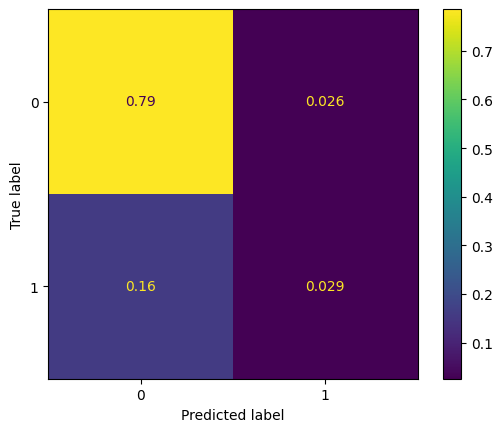

In [38]:
# get confusion matrix display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf_best, X_test, y_test, normalize='all')



In [41]:
# get feature importance table 
importances = rf_best.feature_importances_
feature_names = X_train.columns

# Create df
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
4,AverageViewingDuration,0.121540
0,AccountAge,0.119314
3,ViewingHoursPerWeek,0.117786
1,MonthlyCharges,0.112708
2,TotalCharges,0.107111
5,ContentDownloadsPerMonth,0.099900
6,SupportTicketsPerMonth,0.056350
17,ContentType_Movies,0.011689
16,ContentType_Both,0.011494
7,SubscriptionType_Basic,0.011352


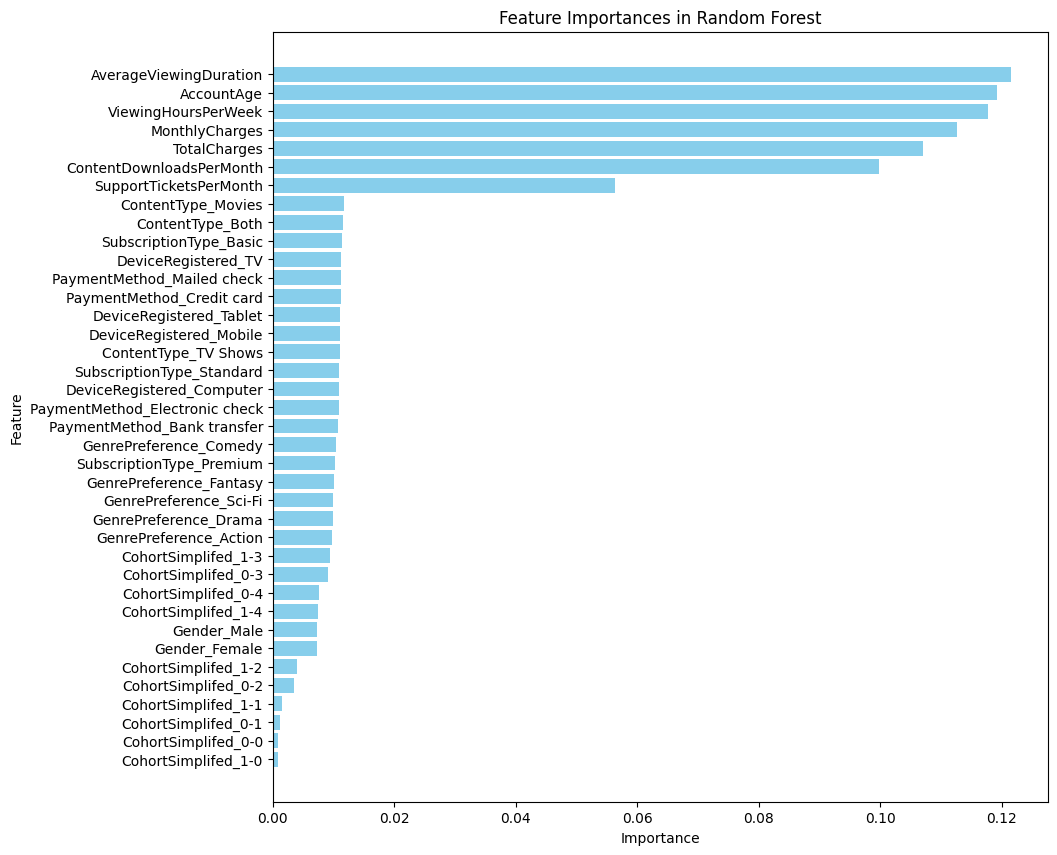

In [43]:
# get feature importance figure 

import matplotlib.pyplot as plt

importance_df = pd.DataFrame({
    'Feature': feature_names, 
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest')
plt.gca().invert_yaxis()
plt.show()

> Results: Results from the random forest model and feature importance produced. these features and weights can be used in business operations to improve products and address churn. 

<hr>

## H. Experiment Outcomes

In [1]:
final_experiment_outcome = 'Hypothesis Confirmed'

> Key Learnings: The results from the random forest model improved the most out of all models tested. 

> Recommendations for Next Experiment: investigating how factors related to engagement can be improved within the business and whether this translates positively with customer retention. 

<hr>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8c3586fc-cd83-4e7b-a04a-11476af0d44a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>